<a href="https://colab.research.google.com/github/hector0820/Data-Analysis-with-Python/blob/main/economic_data_analisis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economic Data Analysis Project with Python Pandas

## Set up

Instaling the fred API

In [ ]:
!pip install fredapi > /dev/nul

Calling the libraries that I will use

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fredapi import Fred


Some style configuration to my polts

In [ ]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]



---



## About the Fred API

We must go to the Fred [site](https://fredaccount.stlouisfed.org/apikey) and request and API key to work with. We get the key as I show below (my key was covered to avoid bat usage).

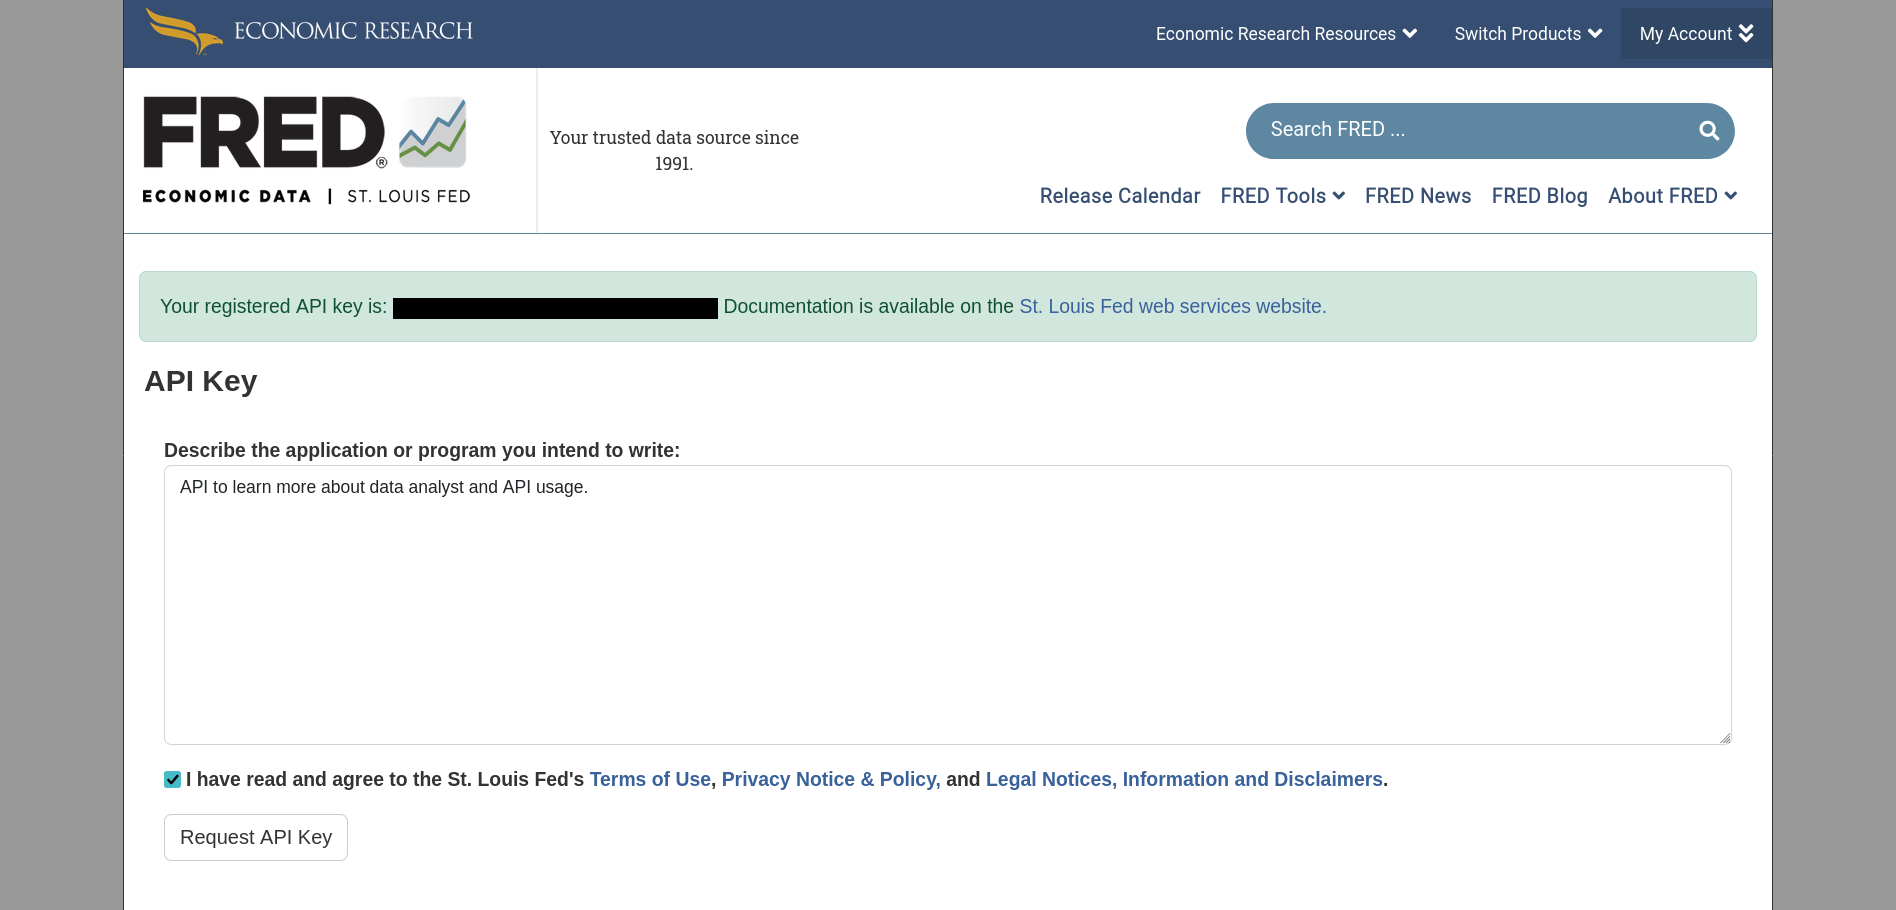

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/key.txt", "r") as file:
  key = file.read()

## Create a Fred Object

We create a Fred Object that we feed it with our API key.

In [ ]:
fred = Fred(api_key=key)

### Search for Economic Data from Fred

We can get our request in a Pandas data frame format!!!
<br>
The limit by default to the API is 1000 rows.

In [ ]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [ ]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-06-27,2023-06-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-27 08:44:10-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-06-27,2023-06-27,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-06-27,2023-06-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-27 08:44:14-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-06-27,2023-06-27,S&P 500,2013-06-27,2023-06-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-06-26 19:10:58-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-06-27,2023-06-27,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDEM01NPA156NWDB,DDEM01NPA156NWDB,2023-06-27,2023-06-27,Stock Market Turnover Ratio (Value Traded/Capi...,1996-01-01,2012-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2019-10-21 14:51:38-05:00,3,Total value of shares traded during the period...
DDEM01MDA156NWDB,DDEM01MDA156NWDB,2023-06-27,2023-06-27,Stock Market Turnover Ratio (Value Traded/Capi...,1996-01-01,1999-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2018-09-21 11:24:15-05:00,3,Total value of shares traded during the period...
DDEM01MKA156NWDB,DDEM01MKA156NWDB,2023-06-27,2023-06-27,Stock Market Turnover Ratio (Value Traded/Capi...,1996-01-01,2012-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2018-09-21 11:24:15-05:00,3,Total value of shares traded during the period...


### Pull Row Data

We get our series in the pandas data frame format, with the index it the time columun, and the value is the price .

In [ ]:
sp500 = fred.get_series(series_id='SP500')

Pandas let us plot easily, as I show in the next command:

<Axes: title={'center': 'S&P 500'}>

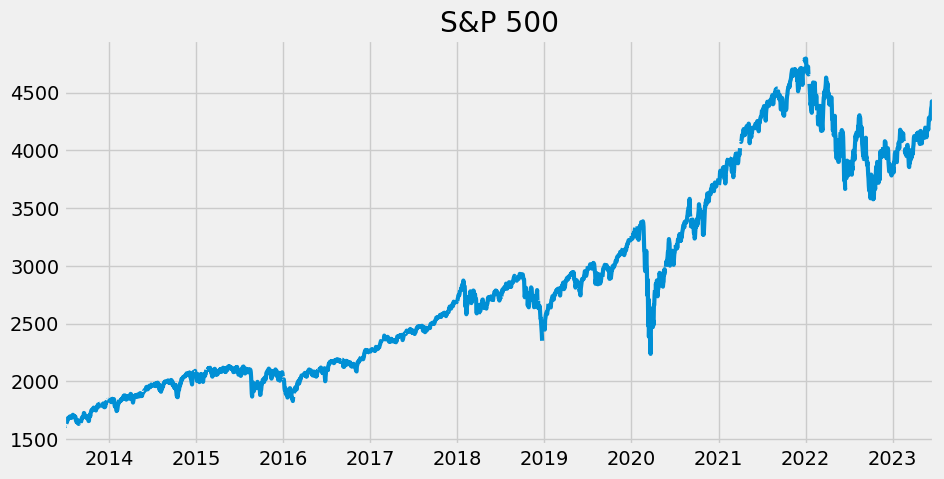

In [ ]:
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw = 3)

### Merging Different Data Frames

I goin to use the unemployment data set from Fred.

In [ ]:
uemp_results = fred.search('unemployment')

In [ ]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-27,2023-06-27,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-06-27,2023-06-27,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,52,The unemployment rate represents the number of...
CCSA,CCSA,2023-06-27,2023-06-27,Continued Claims (Insured Unemployment),1967-01-07,2023-06-10,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-06-22 07:33:03-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-06-27,2023-06-27,Continued Claims (Insured Unemployment),1967-01-07,2023-06-10,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-06-22 07:33:03-05:00,35,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-06-27,2023-06-27,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,65,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTRUM156N,LRUN74TTRUM156N,2023-06-27,2023-06-27,Unemployment Rate: Aged 15-74: All Persons for...,1992-10-01,2021-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-03-10 10:41:06-06:00,6,OECD descriptor ID: LRUN74TT OECD unit ID: ST ...
LRUN64TTCHQ156S,LRUN64TTCHQ156S,2023-06-27,2023-06-27,Unemployment Rate: Aged 15-64: All Persons for...,1998-04-01,2022-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2023-04-20 15:27:04-05:00,6,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
LRUN64TTEZQ156S,LRUN64TTEZQ156S,2023-06-27,2023-06-27,Unemployment Rate: Aged 15-64: All Persons for...,2005-01-01,2022-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2023-04-20 15:26:03-05:00,6,OECD descriptor ID: LRUN64TT OECD unit ID: STS...


We retrieve the series information from the "UNRATE" value

In [ ]:
unrate = fred.get_series('UNRATE')

In [ ]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
Length: 905, dtype: float64

We can see the unemployment seasonly adjusted ploting it

<Axes: >

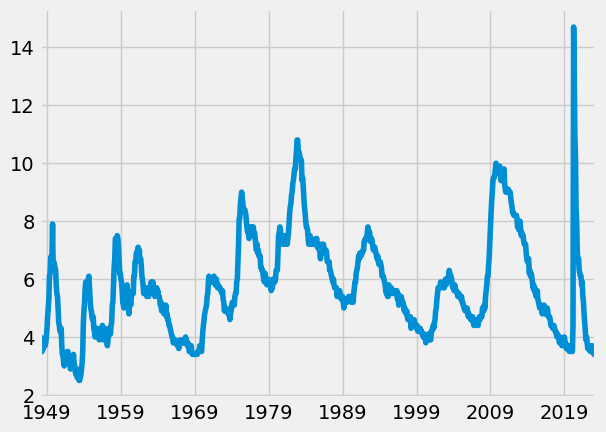

In [ ]:
unrate.plot()



---



I can get the unemployment rate by state and we can use a filter, in this example I use the frequency.

In [ ]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

I can see the columns names from my data set with:

In [ ]:
list(unemp_df.columns)

['id',
 'realtime_start',
 'realtime_end',
 'title',
 'observation_start',
 'observation_end',
 'frequency',
 'frequency_short',
 'units',
 'units_short',
 'seasonal_adjustment',
 'seasonal_adjustment_short',
 'last_updated',
 'popularity',
 'notes']

In [ ]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-27,2023-06-27,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-06-27,2023-06-27,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-06-27,2023-06-27,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:11-05:00,62,The series comes from the 'Current Population ...
CAUR,CAUR,2023-06-27,2023-06-27,Unemployment Rate in California,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-20 14:30:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-06-27,2023-06-27,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000093,LNS14000093,2023-06-27,2023-06-27,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:52-05:00,3,The series comes from the 'Current Population ...
LNS14200000,LNS14200000,2023-06-27,2023-06-27,Unemployment Rate Part-Time Workers,1968-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:45:39-05:00,3,The series comes from the 'Current Population ...
LNS14100000,LNS14100000,2023-06-27,2023-06-27,Unemployment Rate Full-Time Workers,1968-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:52-05:00,3,The series comes from the 'Current Population ...


I want to filter the data by getting that columns that refers to unemployment data from the column title

In [ ]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-27,2023-06-27,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-06-27,2023-06-27,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-06-27,2023-06-27,Unemployment Rate in California,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-20 14:30:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-06-27,2023-06-27,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-06-27,2023-06-27,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,11,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000093,LNS14000093,2023-06-27,2023-06-27,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:52-05:00,3,The series comes from the 'Current Population ...
LNS14200000,LNS14200000,2023-06-27,2023-06-27,Unemployment Rate Part-Time Workers,1968-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:45:39-05:00,3,The series comes from the 'Current Population ...
LNS14100000,LNS14100000,2023-06-27,2023-06-27,Unemployment Rate Full-Time Workers,1968-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:52-05:00,3,The series comes from the 'Current Population ...


In [ ]:
type(unemp_df['title'])

pandas.core.series.Series



---



I going to through all the series that I need using a loop and save them into a new data frame

In [ ]:
all_results = []

for id in unemp_df.index:
  results = fred.get_series(id)
  results = results.to_frame(name = id)
  all_results.append(results)



I have all the information about the unemployment rate, and I want to concatenate this information arround all the list `all_results`.

In [ ]:
df = pd.concat(all_results, axis=1)

Seeing the columns names, I see that there is a few columns that aren't what I expecting, some columuns with numbers in it:

In [ ]:
list(df.columns)

['UNRATE',
 'LNS14000006',
 'CAUR',
 'M0892AUSM156SNBR',
 'M0892BUSM156SNBR',
 'TXUR',
 'FLUR',
 'NYUR',
 'LNS14000031',
 'LNS14000002',
 'U2RATE',
 'LNS14000024',
 'LNS14000003',
 'MIUR',
 'LNS14000009',
 'OHUR',
 'LNS14027662',
 'GAUR',
 'MNUR',
 'NJUR',
 'LNS14000001',
 'TNUR',
 'PAUR',
 'ILUR',
 'NCUR',
 'COUR',
 'MAUR',
 'LNS14024887',
 'ALUR',
 'VAUR',
 'WIUR',
 'SCUR',
 'LNS14027660',
 'ORUR',
 'MOUR',
 'KYUR',
 'LNS14032183',
 'WAUR',
 'NMUR',
 'LAUR',
 'AZUR',
 'LNS14027659',
 'LRUN64TTUSM156S',
 'OKUR',
 'UTUR',
 'ARUR',
 'LASMT261982000000003',
 'WVUR',
 'INUR',
 'AKUR',
 'LNS14000012',
 'NVUR',
 'CTUR',
 'KSUR',
 'LNS14000018',
 'NDUR',
 'MEUR',
 'LNS14000036',
 'MTUR',
 'LNS14000060',
 'MDUR',
 'MSUR',
 'IAUR',
 'DCUR',
 'NEUR',
 'PRUR',
 'LASMT391746000000003',
 'LRHUTTTTUSM156S',
 'HIUR',
 'SDUR',
 'RIUR',
 'CMWRUR',
 'WYUR',
 'NHUR',
 'DEUR',
 'LNS14000028',
 'IDUR',
 'CSOUUR',
 'LNS14024230',
 'LNS14000032',
 'CWSTUR',
 'VTUR',
 'LRUNTTTTUSM156S',
 'CNEWUR',
 'LNS14000

For that, I will remove this columns, looking with regex that columns that have numbers in it, using the pandas series and loc method:

In [ ]:
serie = pd.Series(list(df.columns))
serie = serie.loc[serie.str.contains('[\d]+', regex=True)]

Then I use as list to remove that columns from my df:

In [ ]:
serie = list(serie)
unemp_results = df.drop(serie, axis = 1)

I going to drop the firs column, `UNRATE` because that is not a unemployment rate from any state, and also I will drop all the `NaN` values.

In [ ]:
unemp_states = unemp_results.drop('UNRATE', axis = 1)

I want to track where are these `NaN`, so I can plot them, so have some clues

<Axes: >

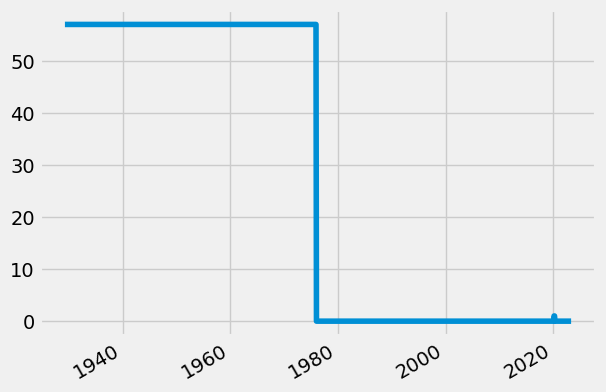

In [ ]:
unemp_states.isna().sum(axis = 1).plot()

I will remove the `NaN` and plot the results

In [ ]:
unemp_states = unemp_states.dropna()

In [ ]:
px.line(unemp_states)

### Plot a Specifict Time

I can see that there is a huge rate of unemployment in the month of May in 2019. I can plot it, to have some insights.

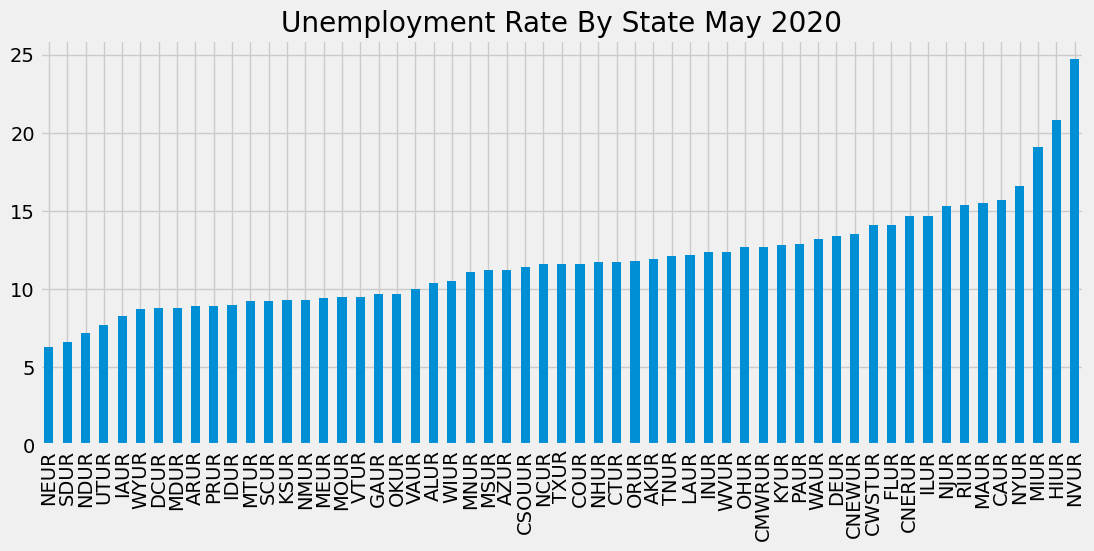

In [ ]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values("2020-05-01") \
    .plot(kind = 'bar', figsize = (12, 5),
          title = 'Unemployment Rate By State May 2020')
ax.legend().remove()

We can see that Nevada had the most higer unemployment rate.



---



I will replace the state code for every state for the current name of the state to see more clearly the plot.

In [ ]:
state_code = unemp_df.drop(serie)['title'] \
  .str.replace('Unemployment Rate in', '') \
  .to_dict()

In [ ]:
unemp_states.columns = [ state_code[state] for state in unemp_states.columns ]

In [ ]:
px.line(unemp_states)

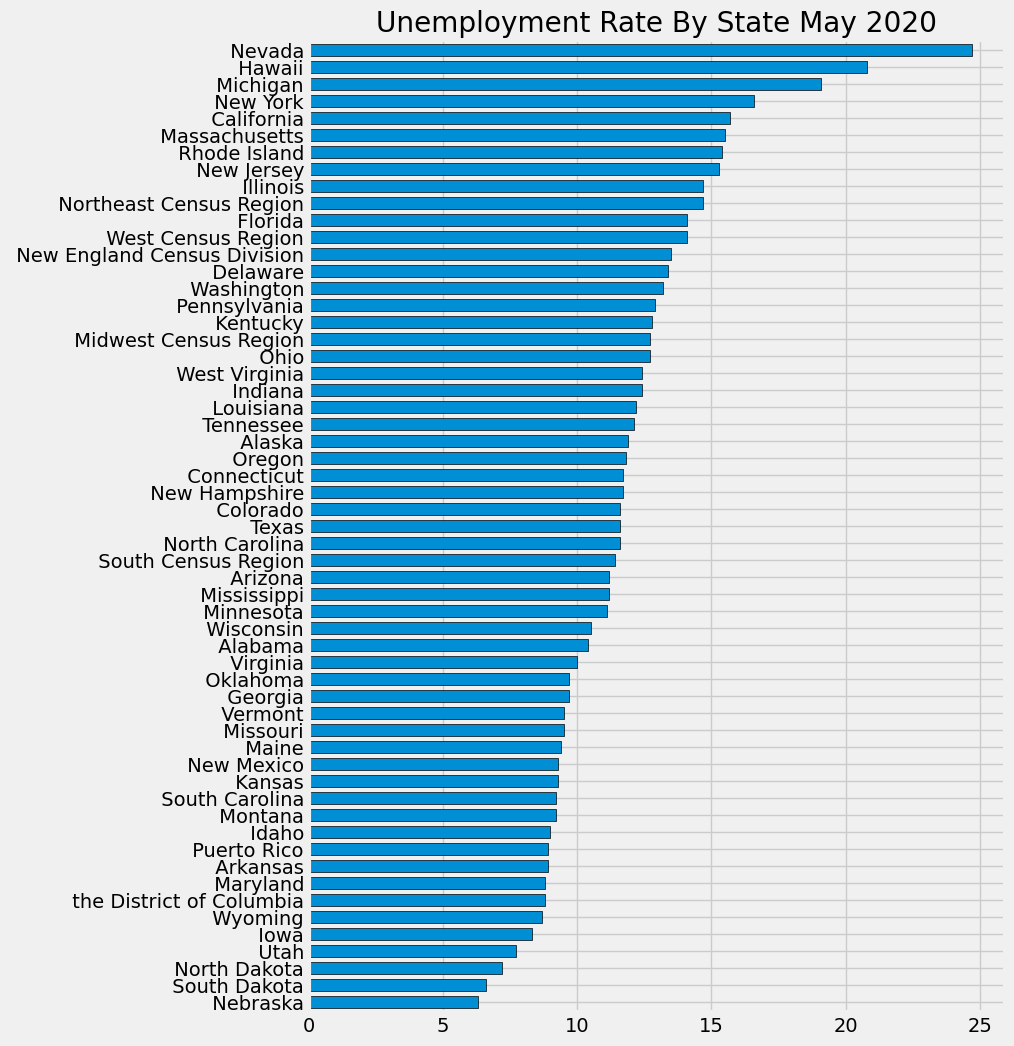

In [ ]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values("2020-05-01") \
    .plot(kind = 'barh', figsize = (8, 12),
          width = 0.7,
          edgecolor = 'black',
          title = 'Unemployment Rate By State May 2020')
ax.legend().remove()